### Pollution and Electoral Campaigns in Mexico

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import pandas as pd

# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
pollution = pd.read_stata('/Users/feliperodriguez/Desktop/RA/Contaminantes/PM25-PM10-1995-2016.dta')

In [3]:
pollution.head()

,fecha,hora,datedaily,monthdate,year,month,indicator,averagedailypm10,averagedailypm25,PM10,...,mgh,mpa,coy,sja,per,nez,uax,cca,aju,gam
0,01/01/1995,1,1995-01-01,420.0,1995.0,January,PM10,145.000000,NaN,82.867874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/01/1995,2,1995-01-01,420.0,1995.0,January,PM10,144.100006,NaN,82.867874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/01/1995,3,1995-01-01,420.0,1995.0,January,PM10,137.899994,NaN,82.867874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01/01/1995,4,1995-01-01,420.0,1995.0,January,PM10,136.199997,NaN,82.867874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01/01/1995,5,1995-01-01,420.0,1995.0,January,PM10,150.100006,NaN,82.867874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pollution.drop(['hora','monthdate'], axis=1, inplace=True)

In [5]:
pollution.head()

,fecha,datedaily,year,month,indicator,averagedailypm10,averagedailypm25,PM10,PM25,lvi,...,mgh,mpa,coy,sja,per,nez,uax,cca,aju,gam
0,01/01/1995,1995-01-01,1995.0,January,PM10,145.000000,NaN,82.867874,NaN,120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/01/1995,1995-01-01,1995.0,January,PM10,144.100006,NaN,82.867874,NaN,120.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/01/1995,1995-01-01,1995.0,January,PM10,137.899994,NaN,82.867874,NaN,122.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01/01/1995,1995-01-01,1995.0,January,PM10,136.199997,NaN,82.867874,NaN,108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01/01/1995,1995-01-01,1995.0,January,PM10,150.100006,NaN,82.867874,NaN,150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print pollution.info()
print pollution.shape()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311184 entries, 0 to 311183
Data columns (total 48 columns):
fecha               311184 non-null object
datedaily           311184 non-null datetime64[ns]
year                311184 non-null float32
month               311184 non-null object
indicator           311184 non-null object
averagedailypm10    190656 non-null float32
averagedailypm25    120528 non-null float32
PM10                311184 non-null float32
PM25                241056 non-null float32
lvi                 140256 non-null float64
tla                 311184 non-null int16
xal                 241056 non-null float64
mer                 311184 non-null int16
ped                 241056 non-null float64
ces                 140256 non-null float64
net                 43824 non-null float64
tli                 190656 non-null float64
vif                 190656 non-null float64
tah                 190656 non-null float64
sur                 140256 non-null float64
fac       

TypeError: 'tuple' object is not callable

In [7]:
pollution.isnull().sum()

fecha                    0
datedaily                0
year                     0
month                    0
indicator                0
averagedailypm10    120528
averagedailypm25    190656
PM10                     0
PM25                 70128
lvi                 170928
tla                      0
xal                  70128
mer                      0
ped                  70128
ces                 170928
net                 267360
tli                 120528
vif                 120528
tah                 120528
sur                 170928
fac                 164352
han                 249816
pla                 223512
sag                  43824
tax                 214752
izt                 225720
aco                 225720
cam                 140256
uiz                 140256
hgm                 227904
sfe                 227904
ati                 278328
cho                 278328
cua                 278328
cut                 278328
ajm                 280512
bju                 280512
i

In [8]:
public_exp = pd.read_stata('/Users/feliperodriguez/Desktop/RA/Expenditure Mexico.dta')

In [9]:
public_exp.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20
0,2012,Central,31 Agrarian Courts,ADMIN3,1 Government,2 Justice,1 Provision of Justice,N/A,E Provision of Public Services,1 Resolution of issues relating to conflicts a...,Expenses,1 Current Expenditure,3000 GENERAL SERVICES,"3500 INSTALLATION, REPAIR , MAINTENANCE AND CO...",358 Housekeeping and waste management,"35801 Laundry, cleaning and hygiene",1 Tax Resources,3 Baja California Sur,"102,564.00","111,111.00"
1,2012,Central,31 Agrarian Courts,N/A,1 Government,2 Justice,1 Provision of Justice,N/A,E Provision of Public Services,1 Resolution of issues relating to conflicts a...,Expenses,1 Current Expenditure,3000 GENERAL SERVICES,"3500 INSTALLATION, REPAIR , MAINTENANCE AND CO...",358 Housekeeping and waste management,"35801 Laundry, cleaning and hygiene",1 Tax Resources,4 Campeche,"70,095.00","157,017.60"
2,2012,Central,31 Agrarian Courts,N/A,1 Government,2 Justice,1 Provision of Justice,N/A,E Provision of Public Services,1 Resolution of issues relating to conflicts a...,Expenses,1 Current Expenditure,3000 GENERAL SERVICES,"3500 INSTALLATION, REPAIR , MAINTENANCE AND CO...",358 Housekeeping and waste management,"35801 Laundry, cleaning and hygiene",1 Tax Resources,5 Coahuila,"109,183.00","113,824.20"
3,2012,Central,31 Agrarian Courts,N/A,1 Government,2 Justice,1 Provision of Justice,N/A,E Provision of Public Services,1 Resolution of issues relating to conflicts a...,Expenses,1 Current Expenditure,3000 GENERAL SERVICES,"3500 INSTALLATION, REPAIR , MAINTENANCE AND CO...",358 Housekeeping and waste management,"35801 Laundry, cleaning and hygiene",1 Tax Resources,6 Colima,"124,863.00","133,620.00"
4,2012,Central,31 Agrarian Courts,N/A,1 Government,2 Justice,1 Provision of Justice,N/A,E Provision of Public Services,1 Resolution of issues relating to conflicts a...,Expenses,1 Current Expenditure,3000 GENERAL SERVICES,"3500 INSTALLATION, REPAIR , MAINTENANCE AND CO...",358 Housekeeping and waste management,"35801 Laundry, cleaning and hygiene",1 Tax Resources,7 Chiapas,"323,048.00","396,266.48"


In [10]:
public_exp.drop(['v4','v7','v8','v9','v10','v14','v15','v16','v17','v19'], axis=1, inplace=True)

In [11]:
public_exp.head()

,v1,v2,v3,v5,v6,v11,v12,v13,v18,v20
0,2012,Central,31 Agrarian Courts,1 Government,2 Justice,Expenses,1 Current Expenditure,3000 GENERAL SERVICES,3 Baja California Sur,"111,111.00"
1,2012,Central,31 Agrarian Courts,1 Government,2 Justice,Expenses,1 Current Expenditure,3000 GENERAL SERVICES,4 Campeche,"157,017.60"
2,2012,Central,31 Agrarian Courts,1 Government,2 Justice,Expenses,1 Current Expenditure,3000 GENERAL SERVICES,5 Coahuila,"113,824.20"
3,2012,Central,31 Agrarian Courts,1 Government,2 Justice,Expenses,1 Current Expenditure,3000 GENERAL SERVICES,6 Colima,"133,620.00"
4,2012,Central,31 Agrarian Courts,1 Government,2 Justice,Expenses,1 Current Expenditure,3000 GENERAL SERVICES,7 Chiapas,"396,266.48"


In [12]:
public_exp.rename(columns={'v1': 'year', 'v2': 'admin1', 'v3': 'admin2', 'v5': 'function1', 'v6': 'function2', 'v11': 'econ0', 'v12': 'econ1', 'v13': 'econ2', 'v18': 'geo1', 'v20': 'executed'}, inplace=True) 

In [13]:
public_exp.head()

,year,admin1,admin2,function1,function2,econ0,econ1,econ2,geo1,executed
0,2012,Central,31 Agrarian Courts,1 Government,2 Justice,Expenses,1 Current Expenditure,3000 GENERAL SERVICES,3 Baja California Sur,"111,111.00"
1,2012,Central,31 Agrarian Courts,1 Government,2 Justice,Expenses,1 Current Expenditure,3000 GENERAL SERVICES,4 Campeche,"157,017.60"
2,2012,Central,31 Agrarian Courts,1 Government,2 Justice,Expenses,1 Current Expenditure,3000 GENERAL SERVICES,5 Coahuila,"113,824.20"
3,2012,Central,31 Agrarian Courts,1 Government,2 Justice,Expenses,1 Current Expenditure,3000 GENERAL SERVICES,6 Colima,"133,620.00"
4,2012,Central,31 Agrarian Courts,1 Government,2 Justice,Expenses,1 Current Expenditure,3000 GENERAL SERVICES,7 Chiapas,"396,266.48"


In [14]:
print public_exp.info()
print public_exp.shape()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348876 entries, 0 to 348875
Data columns (total 10 columns):
year         348876 non-null int16
admin1       348876 non-null object
admin2       348876 non-null object
function1    348876 non-null object
function2    348876 non-null object
econ0        348876 non-null object
econ1        348876 non-null object
econ2        348876 non-null object
geo1         348876 non-null object
executed     348876 non-null object
dtypes: int16(1), object(9)
memory usage: 27.3+ MB
None


TypeError: 'tuple' object is not callable

In [15]:
public_exp.isnull().sum()

year         0
admin1       0
admin2       0
function1    0
function2    0
econ0        0
econ1        0
econ2        0
geo1         0
executed     0
dtype: int64

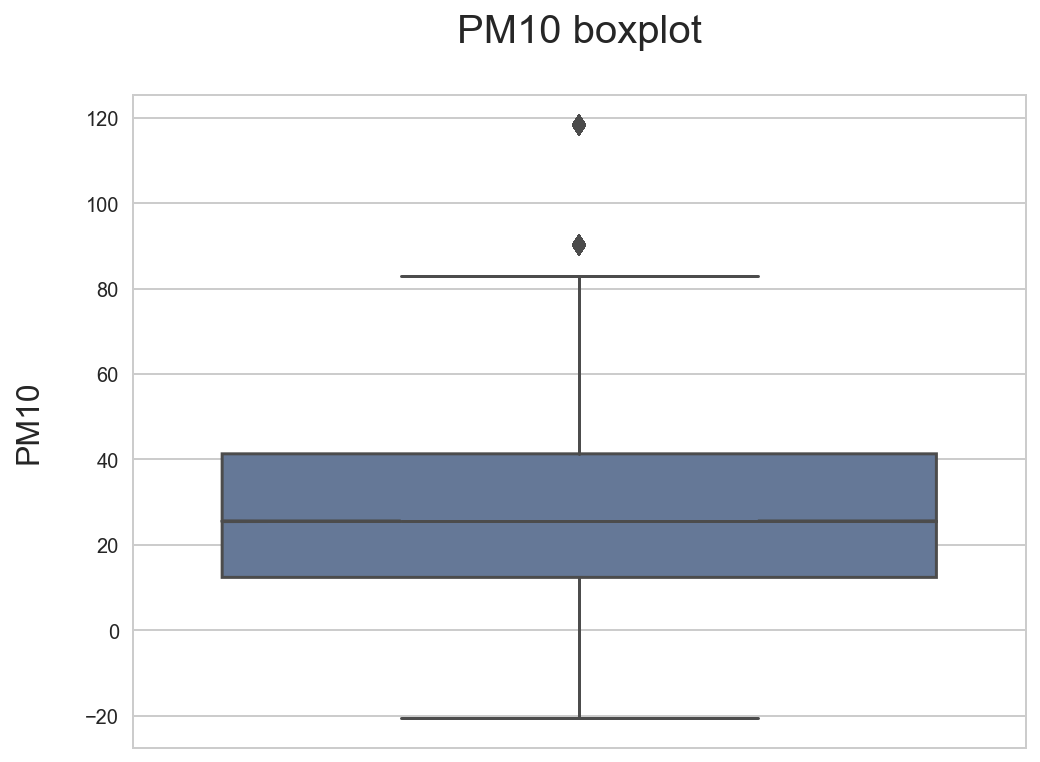

In [16]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(pollution.PM10, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('PM10\n', fontsize=16)
ax.set_title('PM10 boxplot\n', fontsize=20)

plt.show()

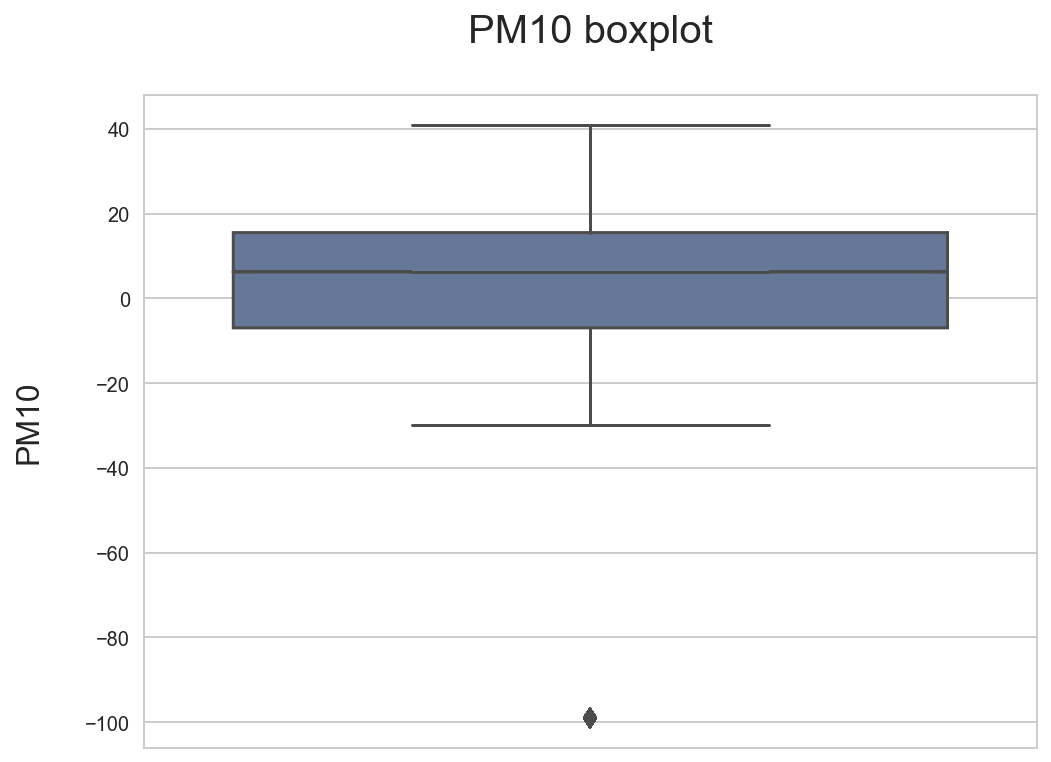

In [18]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(pollution.PM25, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('PM25\n', fontsize=16)
ax.set_title('PM25 boxplot\n', fontsize=20)

plt.show()